In [1]:
import sys    
import csv    
import matplotlib.pyplot as plt    
from matplotlib.backends.backend_pdf import PdfPages    
import pandas as pd    
import seaborn as sns    
from os.path import basename    
    

In [2]:
data1 = "out.csv"
# traces_num is the number of traces for which the monitor found a violation of OD
# (or the highest tested number of traces if the monitor hasn't found a violation)
datait = pd.read_csv(data1, sep=r'\s+', header=None,
                     names=["mon", "traces_num", "input_len", "samples", "verdict", "cputime", "walltime", "mem", "retcode", "traces_id"])

datait.loc[datait['mon'] == 'shl', 'typestr'] = 'shl'
datait.loc[datait['mon'] == 'shl-fun', 'typestr'] = 'shl-fun-' + datait[datait['mon'] == 'shl-fun']['samples'].astype(int).astype(str)
datait.loc[datait['mon'] == 'ehl', 'typestr'] = 'ehl'
datait.loc[datait['mon'] == 'ehl-fun', 'typestr'] = 'ehl-fun-' + datait[datait['mon'] == 'ehl-fun']['samples'].astype(int).astype(str)

datait.loc[datait['mon'] == 'shl', 'montype'] = 'shl'
datait.loc[datait['mon'] == 'shl-fun', 'montype'] = 'shl'
datait.loc[datait['mon'] == 'ehl', 'montype'] = 'ehl'
datait.loc[datait['mon'] == 'ehl-fun', 'montype'] = 'ehl'

MAX_TRACES_NUM = max(datait['traces_num'])

In [3]:
datait

mon  traces_num  input_len  samples  verdict  cputime  walltime  \
0        shl           8          1      NaN    False     0.00      0.00   
1        shl           8          3      NaN    False     0.00      0.00   
2        shl          16          2      NaN    False     0.00      0.00   
3    shl-fun           4          1      1.0    False     0.00      0.00   
4        shl          64          4      NaN    False     0.00      0.00   
..       ...         ...        ...      ...      ...      ...       ...   
495      shl         512          5      NaN    False     0.48      0.50   
496      shl        1024          7      NaN    False     1.90      1.93   
497      shl        2048         10      NaN     True    16.62     16.83   
498      shl        2048          8      NaN    False    16.54     16.77   
499      shl        2048          9      NaN     True    16.67     16.89   

            mem  retcode   traces_id    typestr montype  
0      4.121094        1   749892325        shl     shl  
1      3.921875        1   749892325        shl     shl  
2      4.113281        1   749892325        shl     shl  
3      4.429688        1   749892325  shl-fun-1     shl  
4      4.617188        1   749892325        shl     shl  
..          ...      ...         ...        ...     ...  
495   33.187500        1  2142465392        shl     shl  
496   90.128906        1  2142465392        shl     shl  
497  475.898438        0  2142465392        shl     shl  
498  475.675781        1  2142465392        shl     shl  
499  475.843750        0  2142465392        shl     shl  

[500 rows x 12 columns]

In [9]:
labels_map = {
    "ehl": "eHL no samples",
    "ehl-fun-1": "eHL 1 sample",    
    "ehl-fun-2": "eHL 2 samples",    
    "ehl-fun-3": "eHL 3 samples",    
    "ehl-fun-4": "eHL 4 samples",
    "shl": "no samples",
    "shl-fun-1": "1 sample",    
    "shl-fun-2": "2 samples",    
    "shl-fun-3": "3 samples",    
    "shl-fun-4": "4 samples",
}

def name_labels(g):
    g.legend.set_title("")
    labels = g.legend.texts
    for l in labels:
        l.set_text(labels_map.get(l.get_text(), l.get_text()))

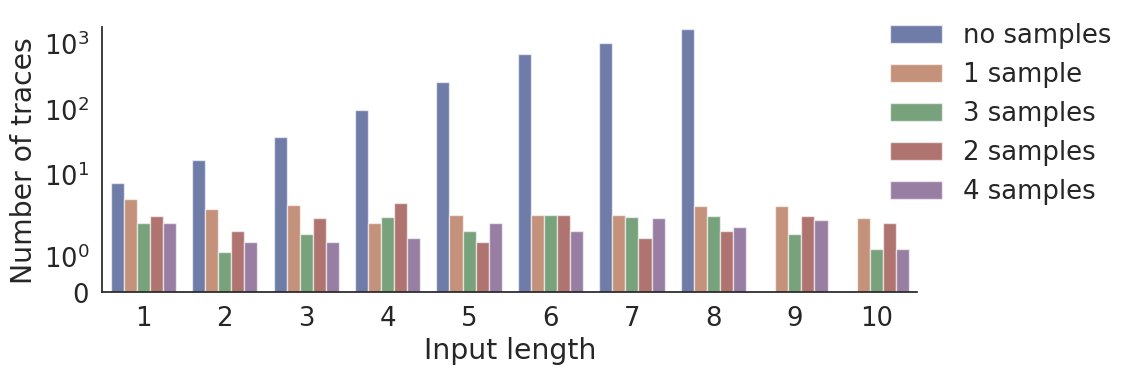

In [10]:
sns.set()
sns.set_theme(style="white", font_scale=1.7)

D = datait[datait['montype'] == 'shl']
D = D[D['verdict'] == False]
g = sns.catplot(
    data=D, kind="bar",
    x="input_len", y="traces_num", hue="typestr",
    errorbar=None, palette="dark", alpha=.6, height=4, aspect=2.5
)
plt.yscale('symlog')
g.set_axis_labels("Input length", "Number of traces")
name_labels(g)

sns.move_legend(g, "upper right")
fig = g.fig
fig.savefig('traces_to_violation.pdf', dpi=600)


In [11]:
sub = datait[["traces_id", "traces_num", "typestr", "input_len", "verdict", "cputime"]]
#sub['tracesstr'] = datait['traces_id'].astype(str)+'-'+datait['input_len'].astype(str)
sub.groupby(["typestr","verdict"]).count()

traces_id  traces_num  input_len  cputime
typestr   verdict                                           
shl       False           70          70         70       70
          True            30          30         30       30
shl-fun-1 False          100         100        100      100
shl-fun-2 False          100         100        100      100
shl-fun-3 False          100         100        100      100
shl-fun-4 False          100         100        100      100

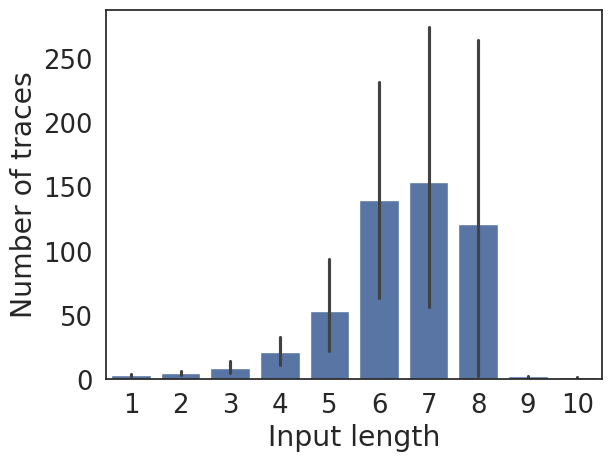

In [12]:
sns.set()
sns.set_theme(style="white", font_scale=1.7)
g = sns.barplot(data=D,
                x="input_len", y="traces_num")

# Get the current axes object
ax = plt.gca()

# Remove the top and right spines
#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)

# Customize the appearance of the remaining spines
#ax.spines["bottom"].set_linewidth(0.5)  # Set the linewidth of the bottom spine
#ax.spines["left"].set_linewidth(0.5)  # Set the linewidth of the bottom spine
#ax.spines["left"].set_linestyle("--")  # Set the linestyle of the left spine
plt.xlabel("Input length")
plt.ylabel("Number of traces")
#plt.xticks(size=14)
#plt.yticks(size=14)
plt.savefig("hna-violation-per-input.pdf", bbox_inches='tight', dpi=600)

AttributeError: 'function' object has no attribute 'set_title'

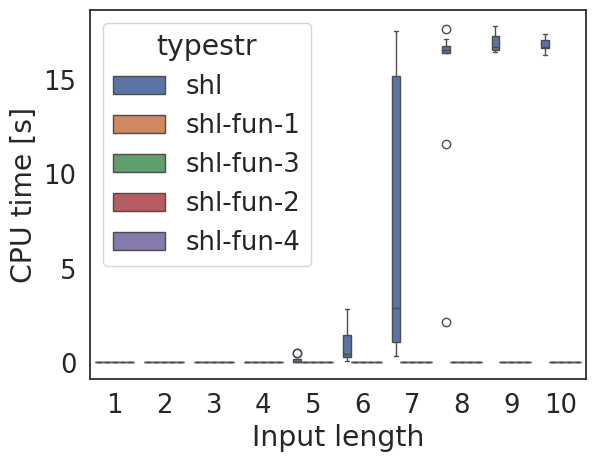

In [13]:
D = datait[datait['montype'] == 'shl']
g = sns.boxplot(data=D, x="input_len", y="cputime", hue="typestr")
plt.xlabel("Input length")
plt.ylabel("CPU time [s]")
name_labels(g)


plt.savefig("cputime.pdf", bbox_inches='tight', dpi=600)